# **1. METADATA**
**Cervical cancer** is one of the most preventable and treatable forms of cancer when detected early through proper screening and risk assessment. In many developing regions, however, lack of access to healthcare and diagnostic services contributes to late-stage detection, leading to higher mortality rates.

Here provided with a dataset containing anonymized information about 858 women. Primary objective is to build machine learning models that can predict the likelihood of a positive biopsy diagnosis for cervical cancer based on these risk factors.

**Dataset description:**

**Dataset**: risk_factors_cervical_cancer.csv

**Target Variable:** Biopsy (0 = No cervical cancer, 1 = Cancer detected)

The dataset contains the following types of **features:**

• **Demographic**: Age, number of sexual partners, pregnancies

•	**Behavioral**: Smoking, contraceptive use

•	**Medical history**: STDs, HPV infection

•	**Diagnosis results**: Hinselmann, Schiller, Citology, and Biopsy (targets)


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. Data Visualization and Exploration**

In [ ]:
# a.	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
df=pd.read_csv("risk_factors_cervical_cancer.csv", na_values='?')
df.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


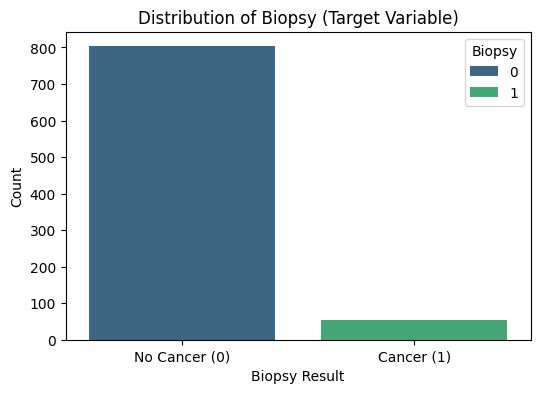

In [ ]:
# b.	Provide appropriate data visualizations to get an insight about the dataset.
# Distribution of the target variable (Biopsy)
plt.figure(figsize=(6, 4))
sns.countplot(x='Biopsy', data=df, hue='Biopsy', palette='viridis')
plt.title('Distribution of Biopsy (Target Variable)')
plt.xlabel('Biopsy Result')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Cancer (0)', 'Cancer (1)'])
plt.show()

Clearly we can see this is an unbalanced class.

In [ ]:
# Identify numerical columns, excluding the target variable 'Biopsy'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Biopsy' in numerical_cols:
    numerical_cols.remove('Biopsy')

# Print the list of numerical feature names
print("Numerical Features:")
print(numerical_cols)

Numerical Features:
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


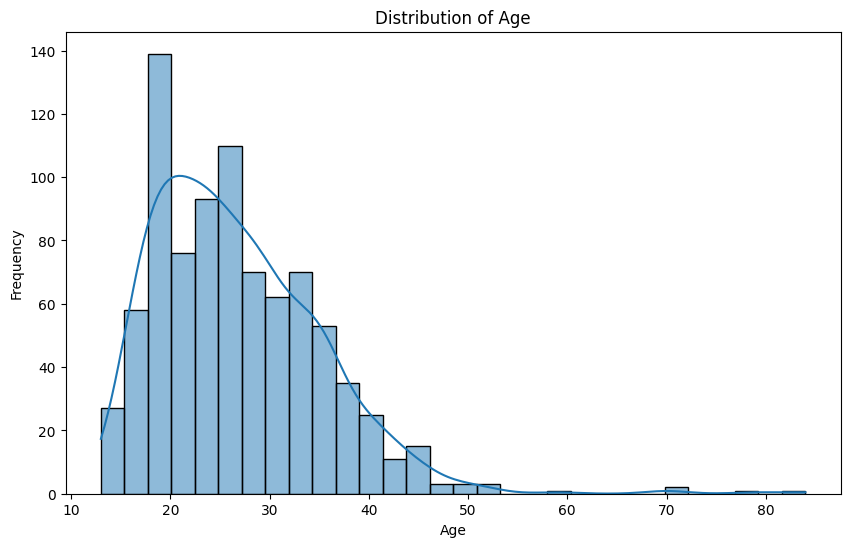

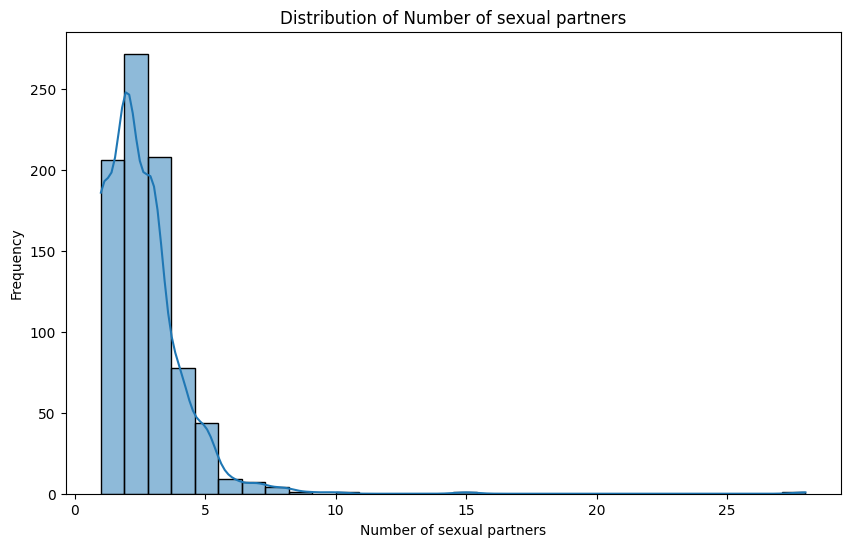

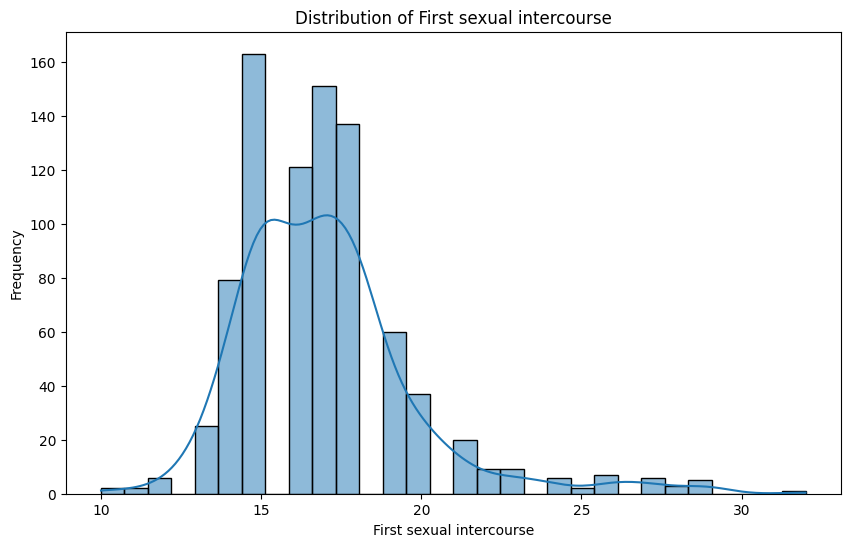

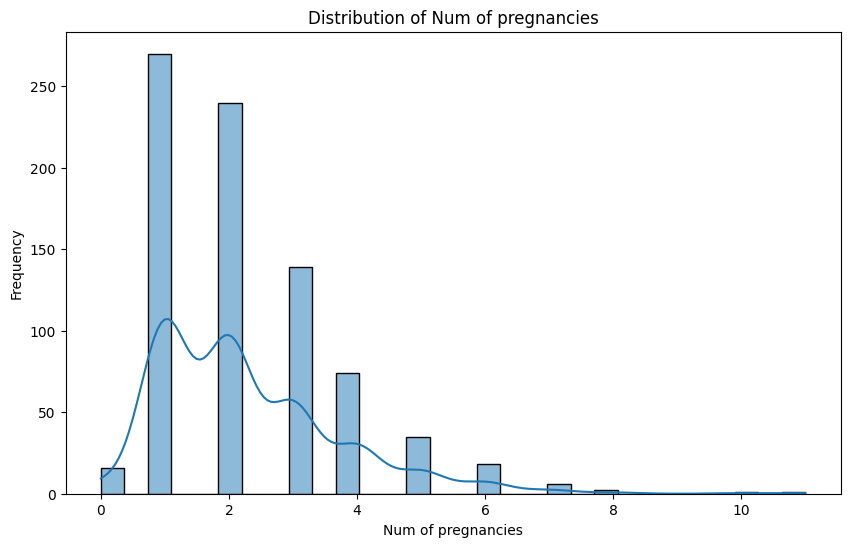

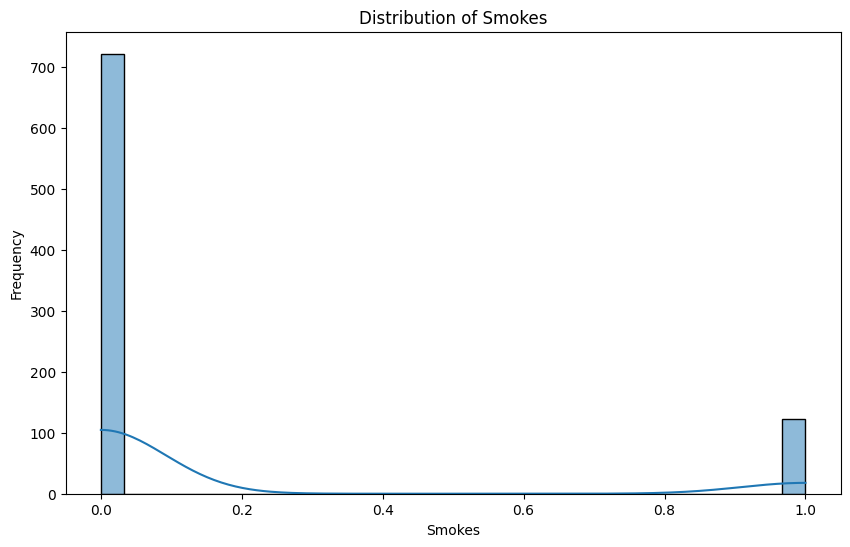

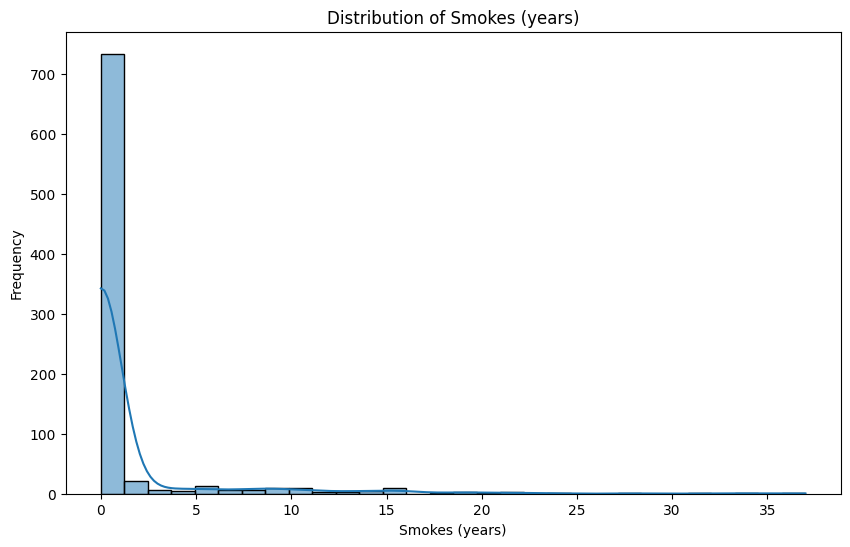

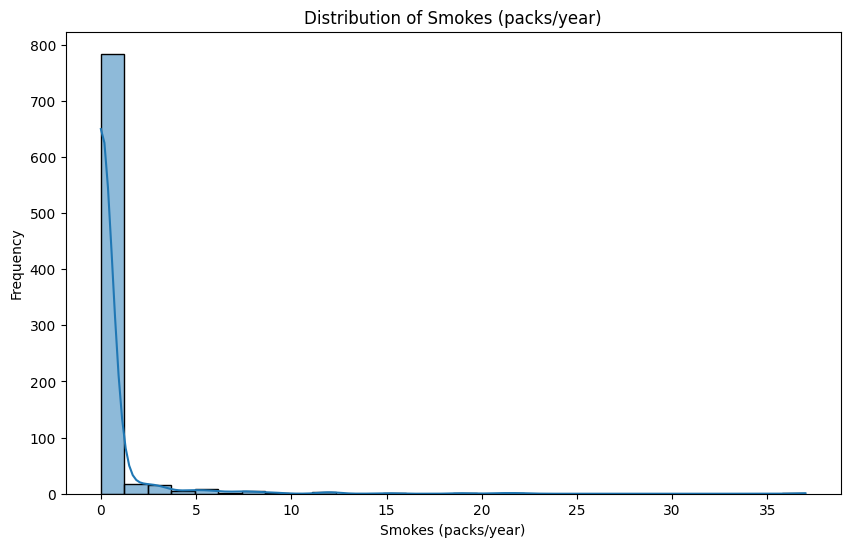

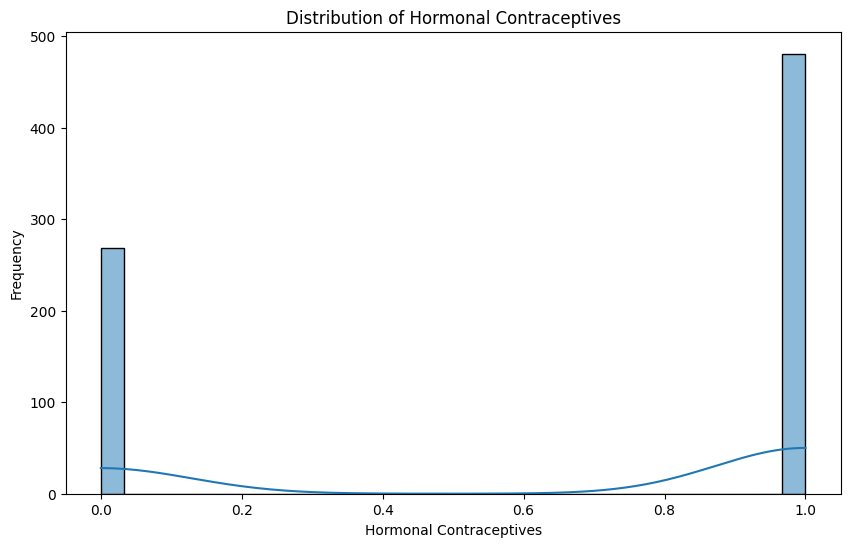

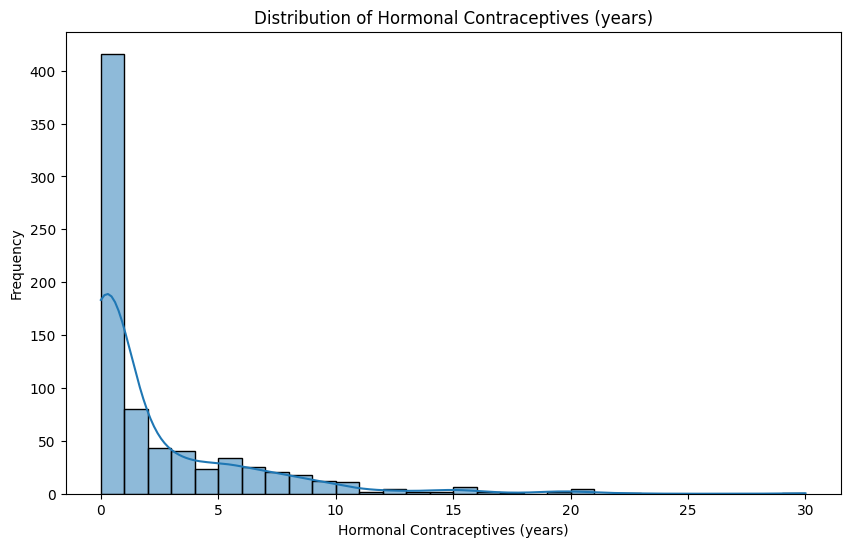

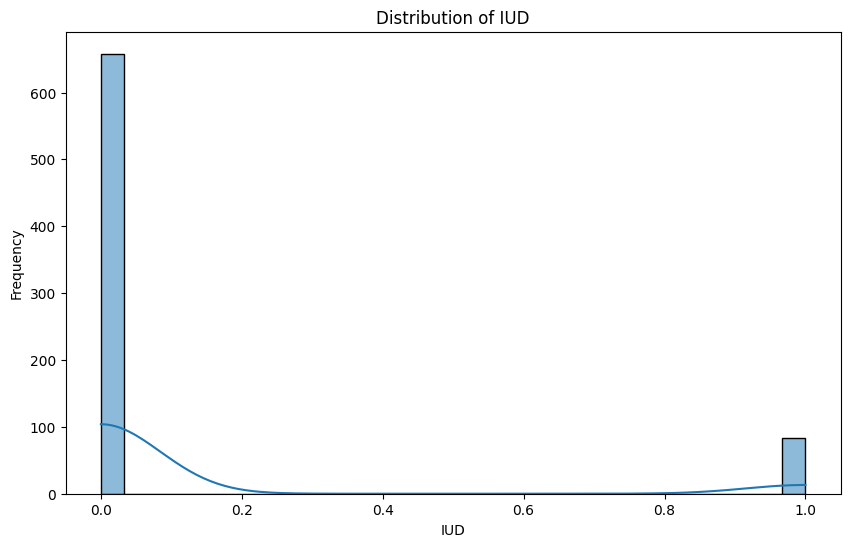

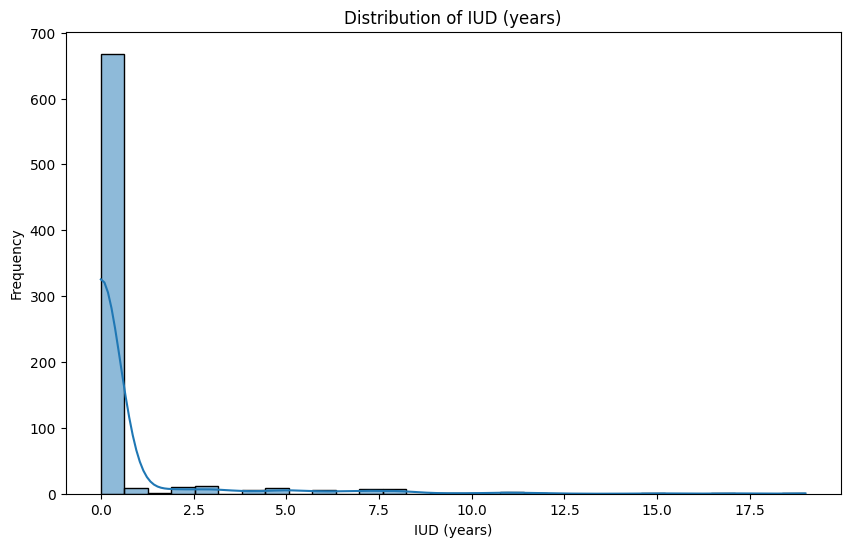

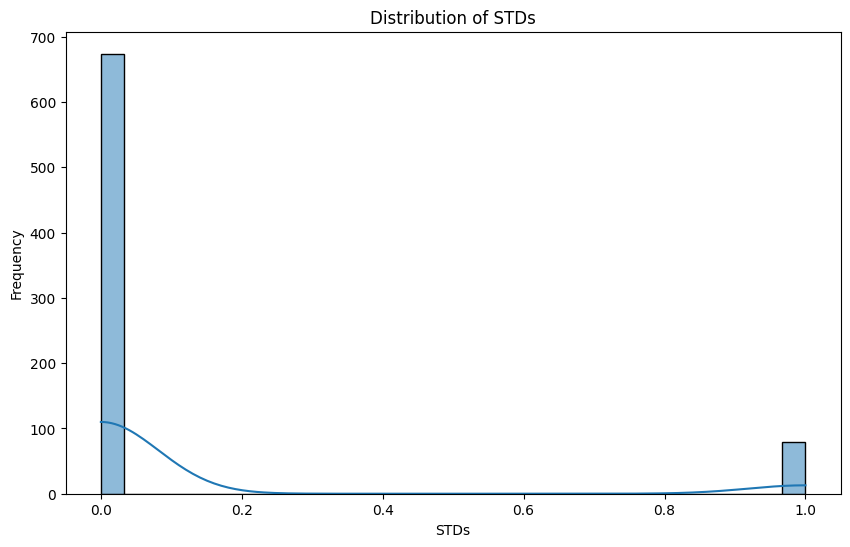

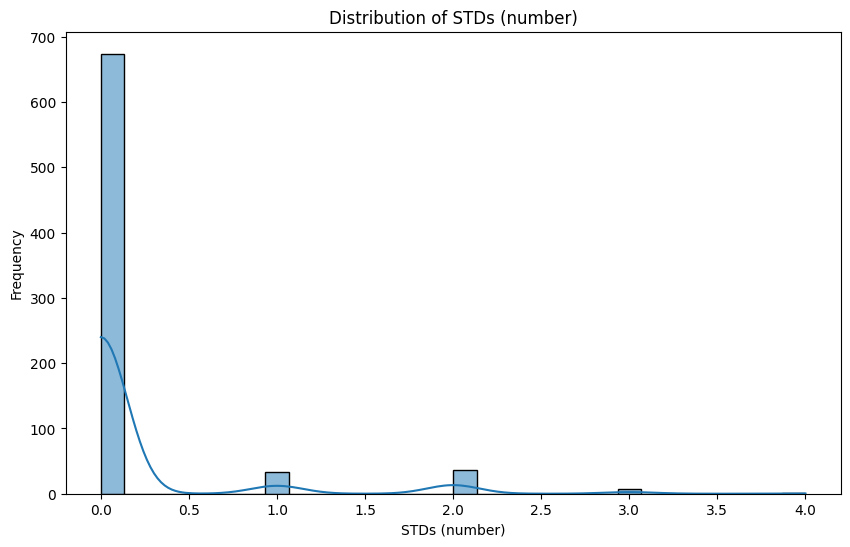

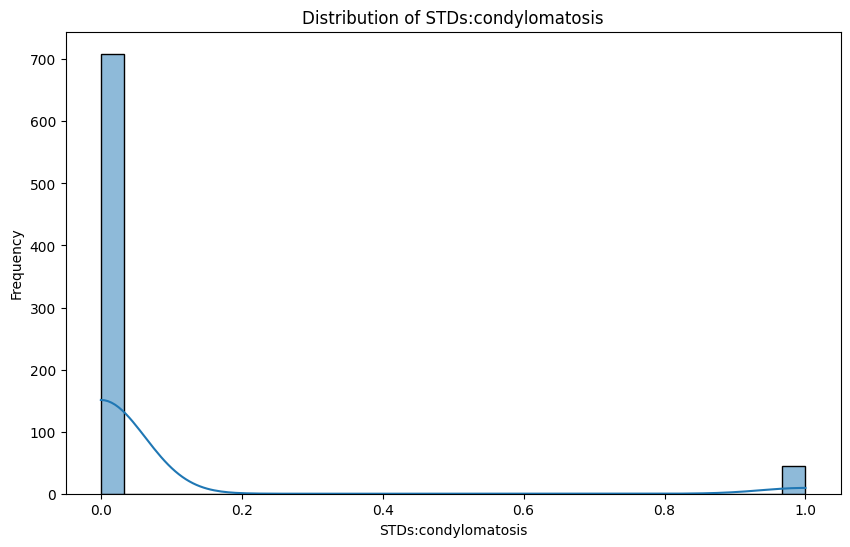

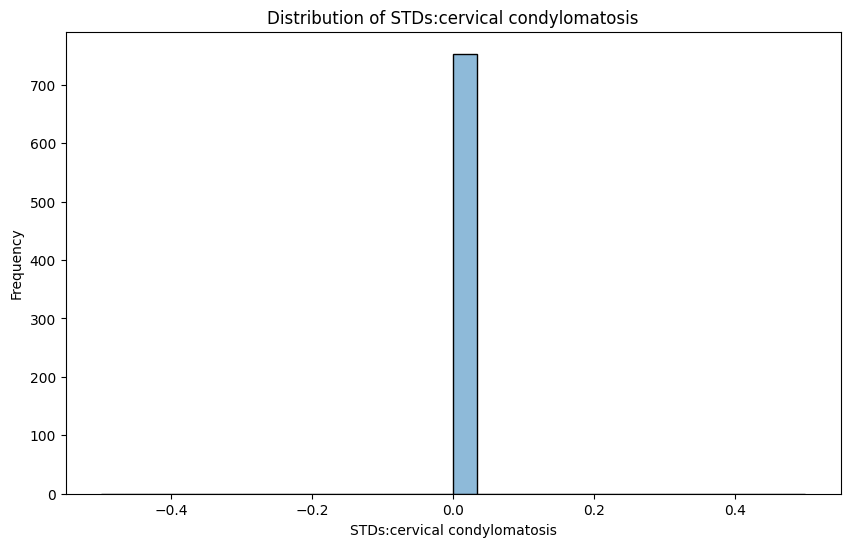

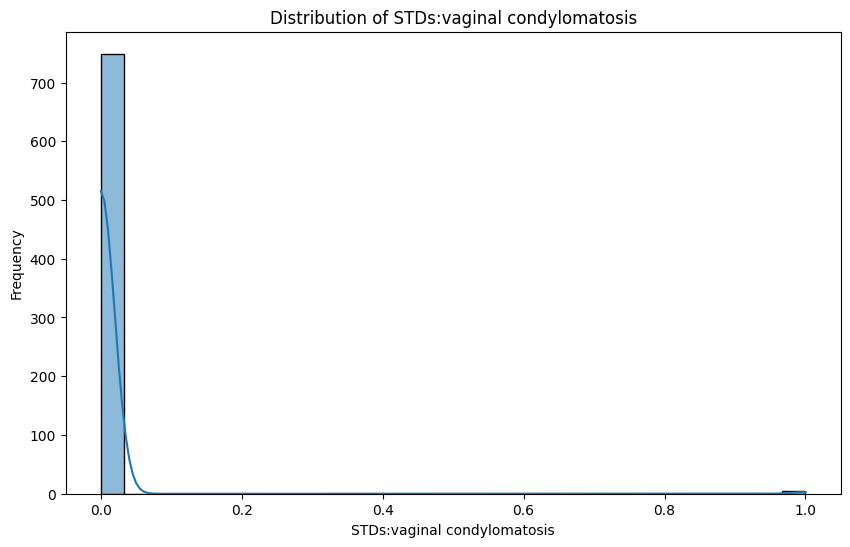

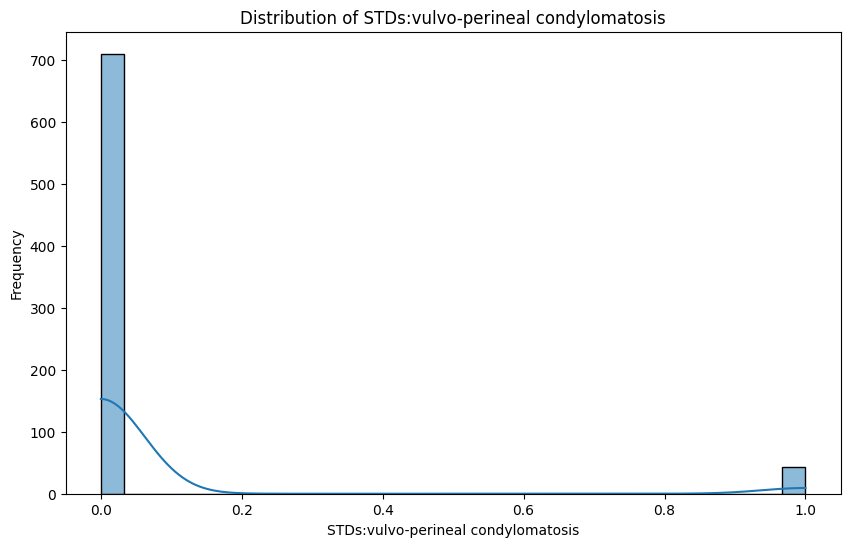

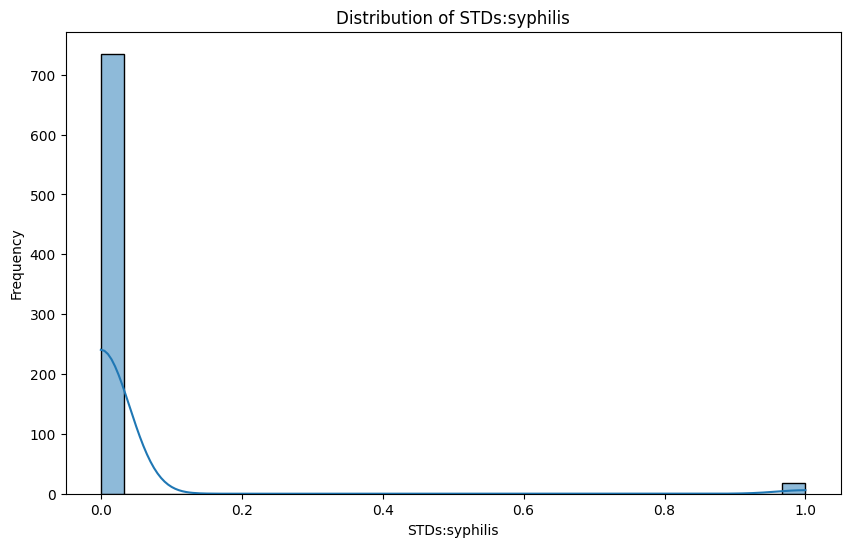

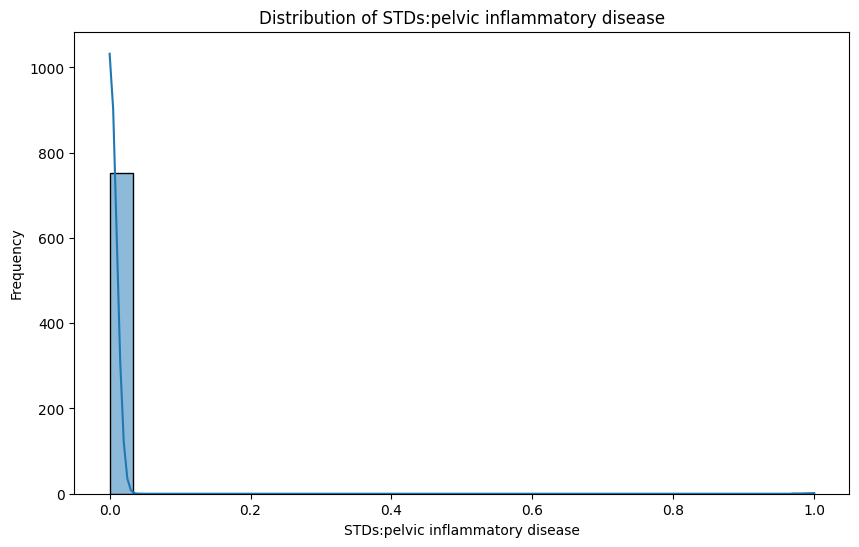

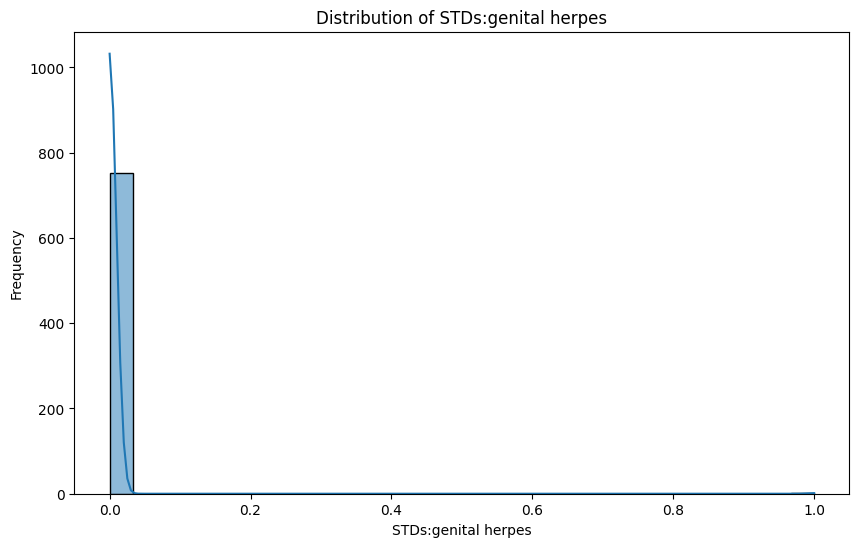

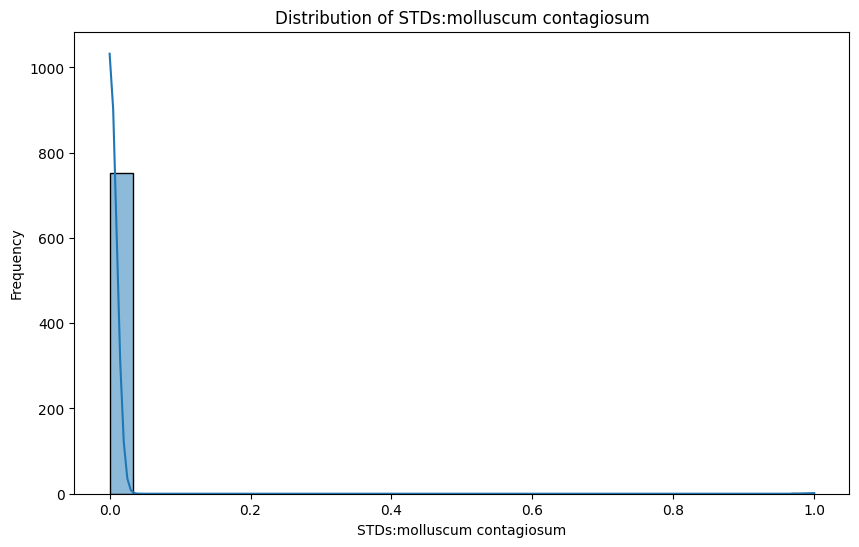

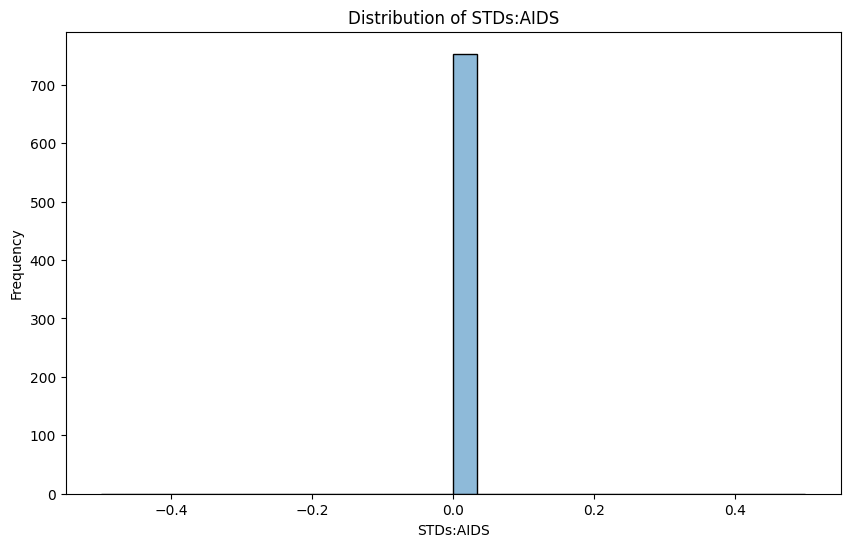

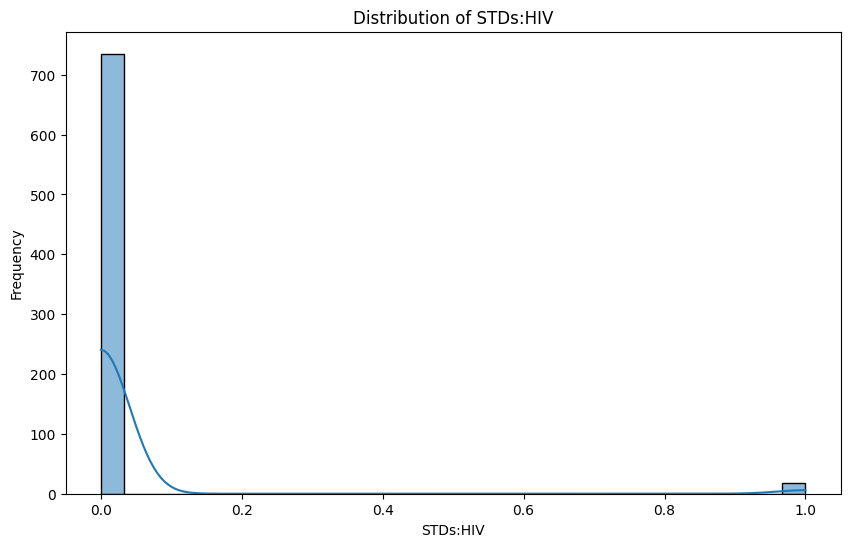

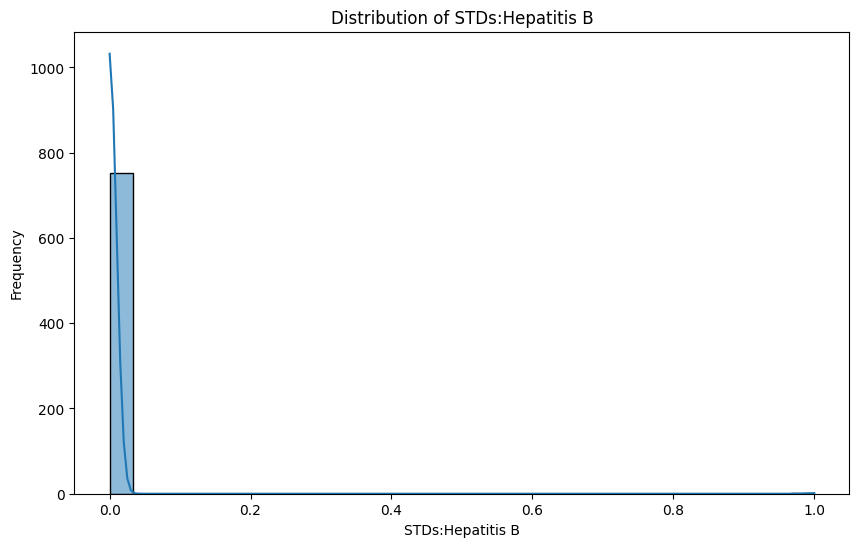

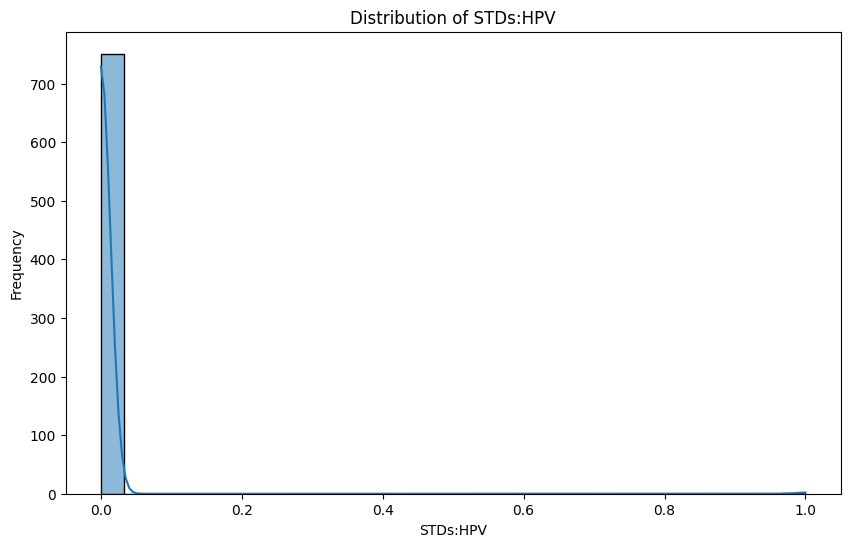

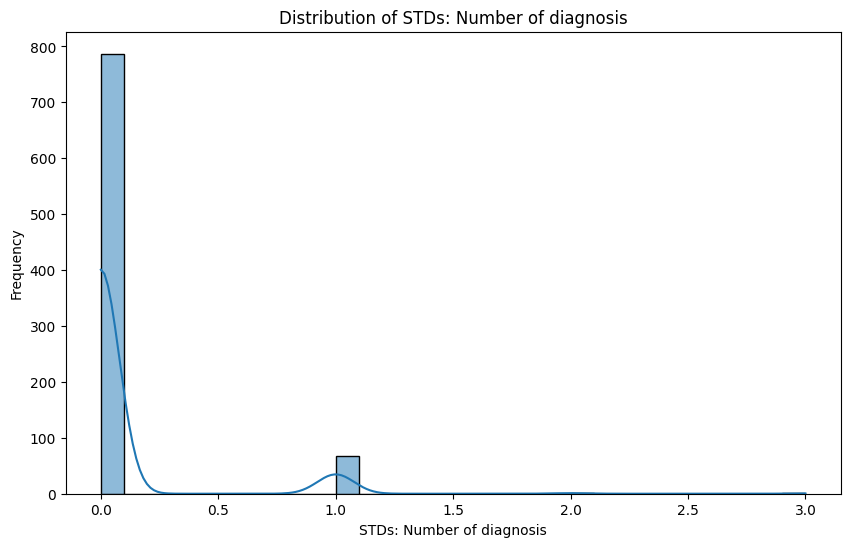

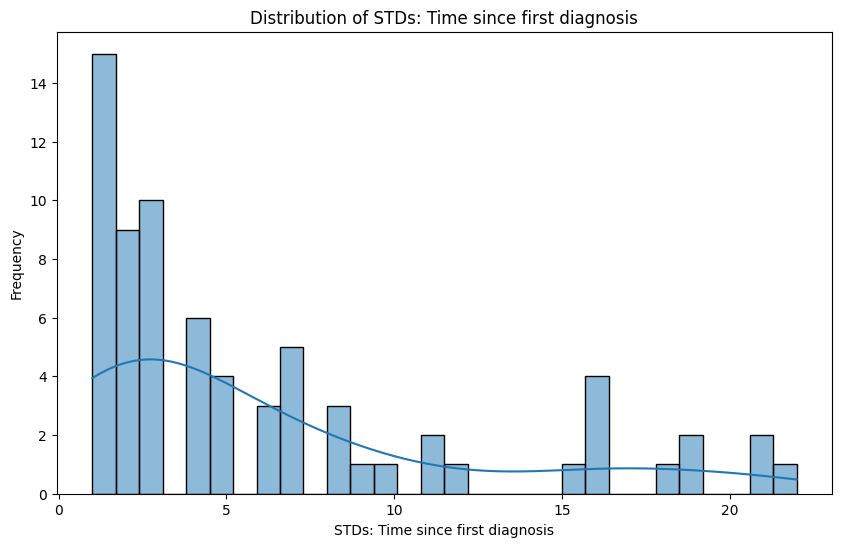

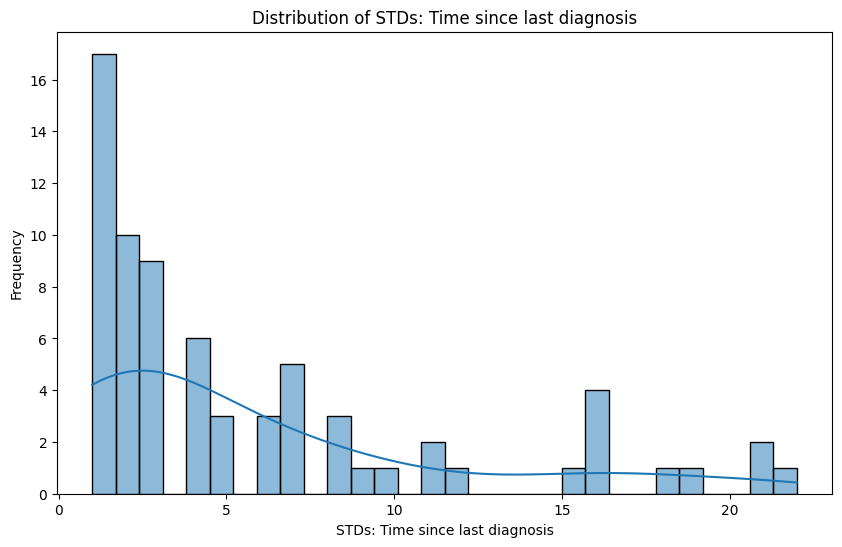

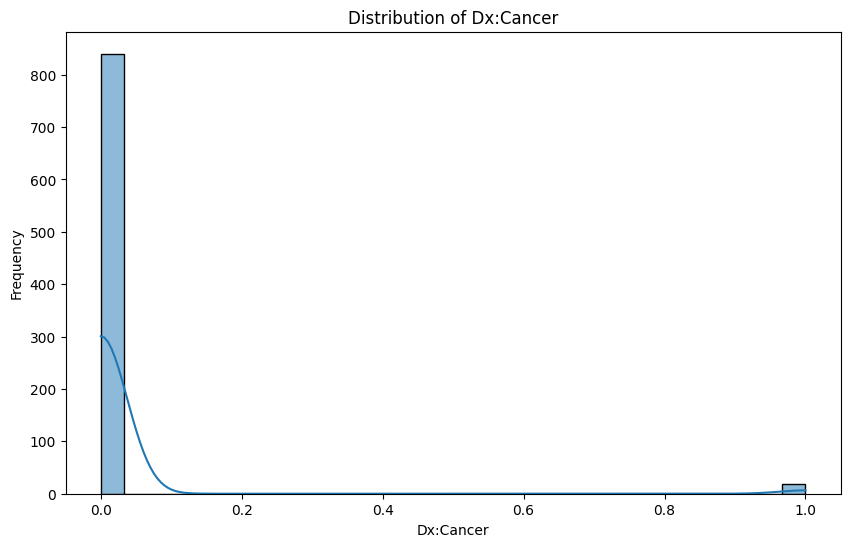

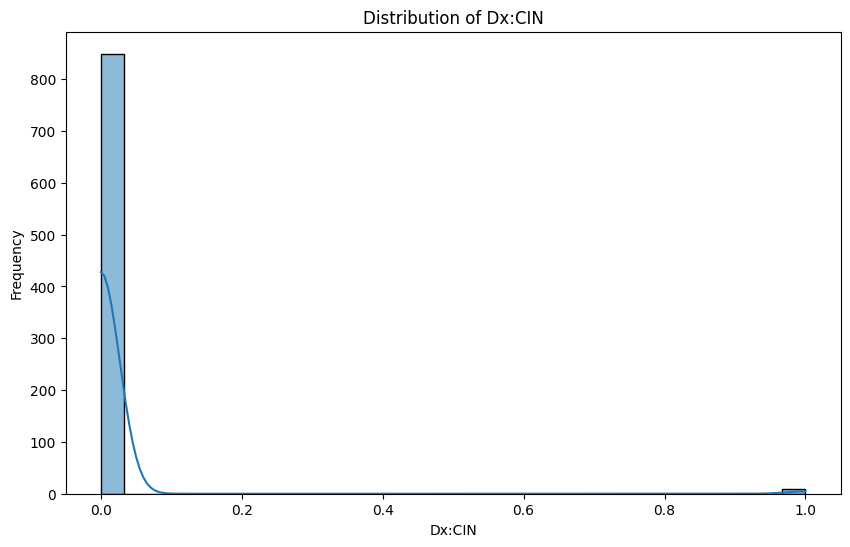

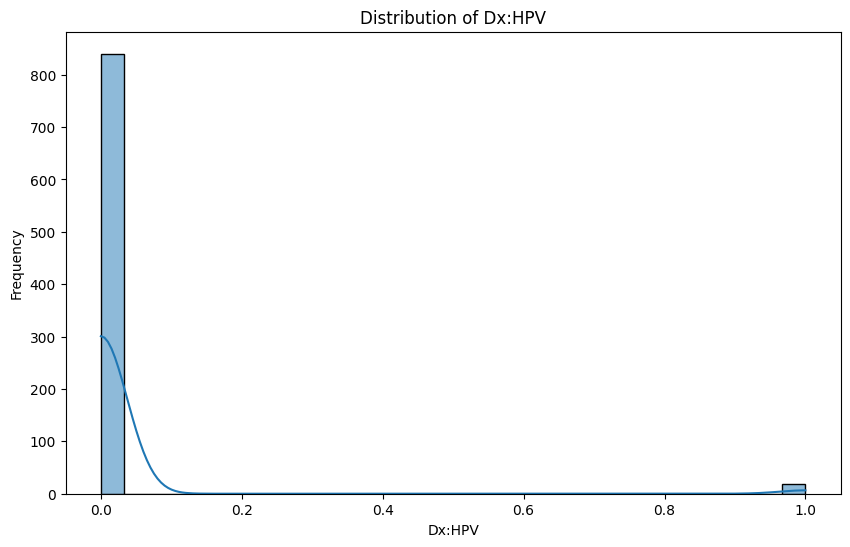

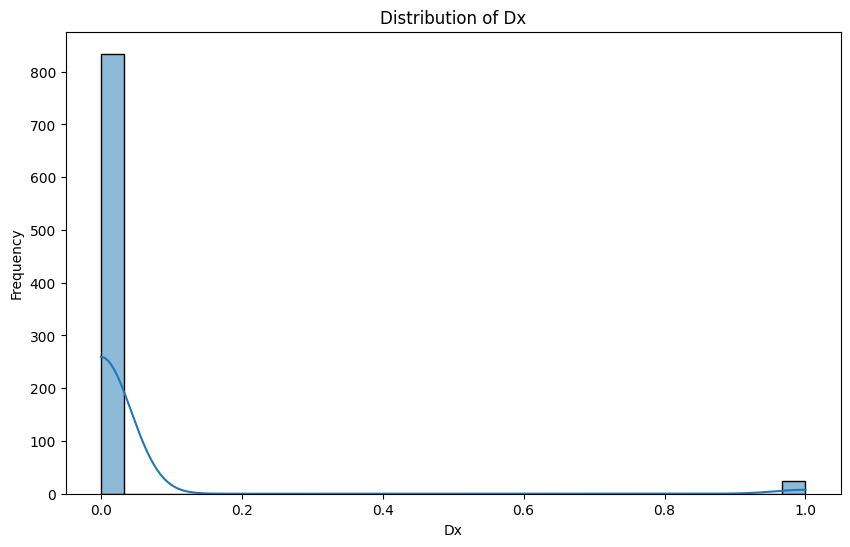

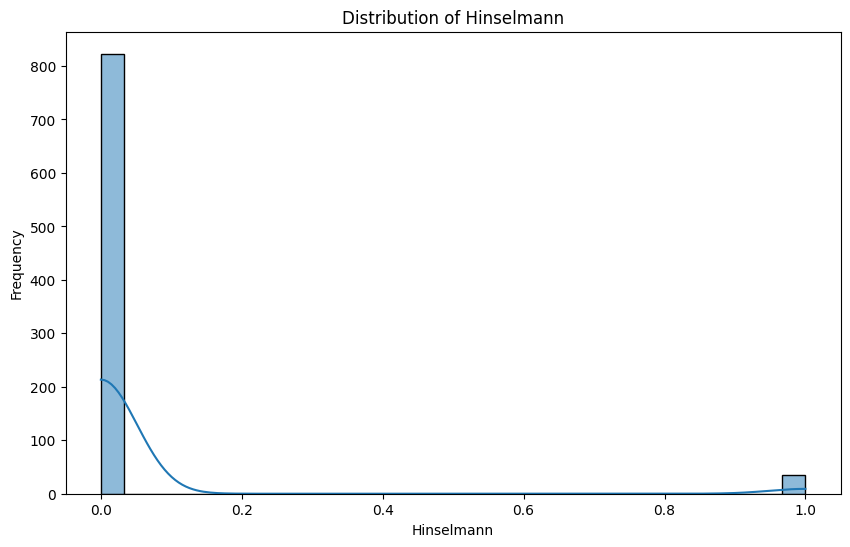

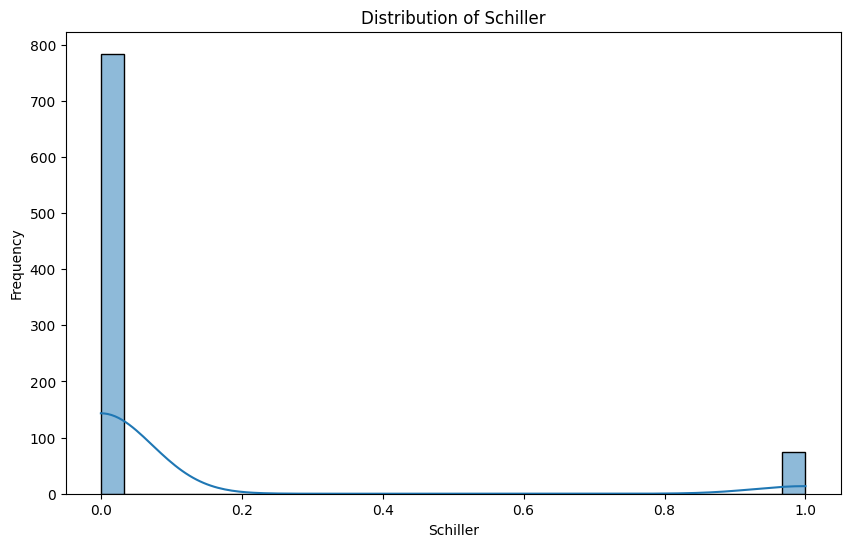

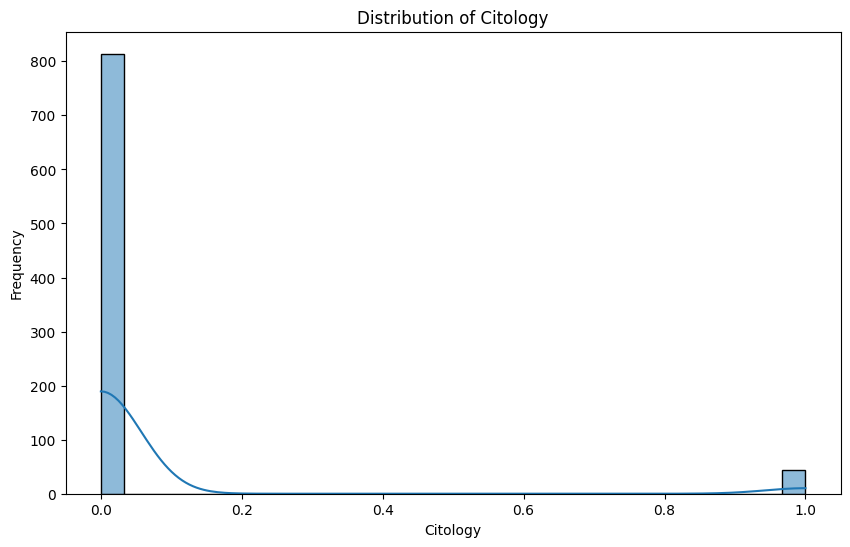

In [ ]:
# Create histograms for each numerical feature (excluding Biopsy)
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## **Observations**
*  **Age:** The distribution is right-skewed, indicating a larger number of
younger women in the dataset, with a peak around the early to mid-twenties.

*  **Number of sexual partners:** The distribution is also right-skewed, with most women reporting a lower number of sexual partners. There are a few outliers with a much higher number.

*  **First sexual intercourse:** This distribution is somewhat normal, with a peak around 15-18 years old.

*  **Num of pregnancies**: Heavily right-skewed, with most women having a small number of pregnancies.

* **Smokes, Hormonal Contraceptives, IUD, STDs, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Hinselmann, Schiller, Citology:** These are mostly binary or low-cardinality categorical features disguised as numerical. The histograms show the counts for each category (usually 0 and 1), highlighting the imbalance in some of these features (e.g., many more 0s than 1s).

*  **Smokes (years), Smokes (packs/year), Hormonal Contraceptives (years), IUD (years), STDs (number), STDs: Time since first diagnosis, STDs: Time since last diagnosis, STDs: Number of diagnosis:** These show varying degrees of right-skewness, with most values concentrated at the lower end. This suggests that many women have not engaged in these behaviors for a long time or have not had many occurrences.

* **STDs:condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:HIV, STDs:Hepatitis B, STDs:HPV:** Similar to the binary features, these show the distribution of specific STD types, with the majority of observations being 0 (no diagnosis of that specific STD). Some of these features, like STDs:cervical condylomatosis and STDs:AIDS, have only one unique value (0), indicating no cases of these STDs in the dataset.

Overall, the histograms reveal significant skewness and imbalances in many features, which is important to consider for subsequent data preprocessing and model building steps.

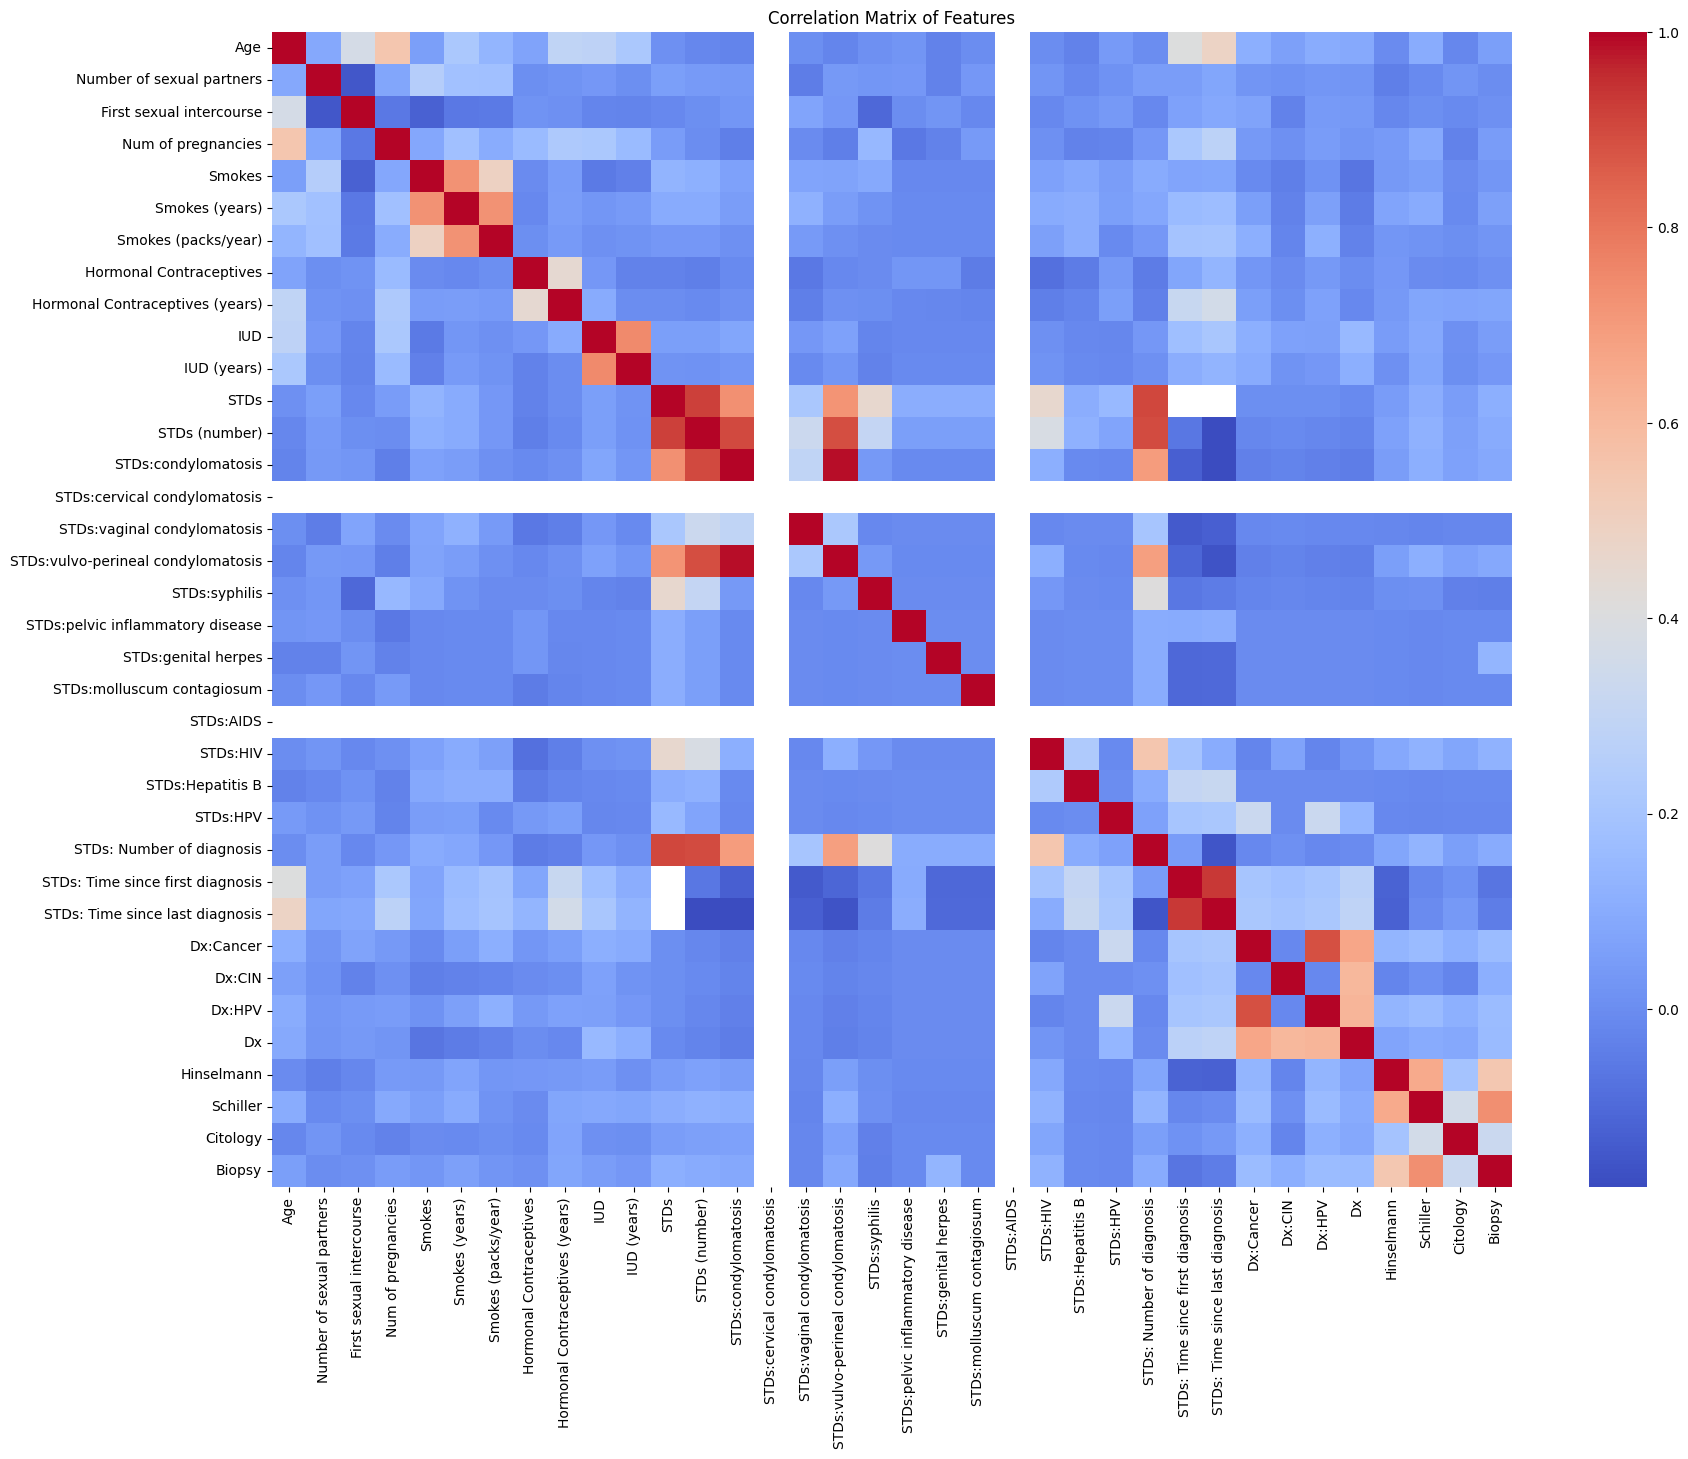

In [ ]:
# c.Do the correlational analysis on the dataset. Provide a visualization for the same.
# Will this correlational analysis have effect on feature selection that you will perform in the next step?
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Effect of Correlational Analysis on Feature Selection:**

Yes, correlational analysis can significantly impact feature selection.

* **Identifying Highly Correlated Features**: Features that are highly correlated with each other (either positively or negatively) can provide redundant information to a machine learning model. Including multiple highly correlated features can lead to issues like multicollinearity, which can make models less stable and harder to interpret. In such cases, you might choose to keep only one of the highly correlated features and drop the others.


* **Identifying Features Correlated with the Target Variable:** Features that have a strong correlation with the target variable ('Biopsy' in this case) are potentially more informative for predicting the target. Analyzing these correlations can help prioritize which features to consider for your model. Features with very low correlation to the target might be less useful and could potentially be excluded, although this should be done carefully and in conjunction with other feature selection methods.

In summary, the correlation matrix helps you understand the relationships between your features and with the target variable, guiding you in making informed decisions about which features to include or exclude from your model to improve performance and avoid issues like multicollinearity.

**Observations from Heatmap**

*  **High Positive Correlation with Biopsy:** The features Schiller and Hinselmann show the strongest positive correlation with the target variable Biopsy. This suggests that a positive result in these diagnostic tests is highly associated with a positive biopsy result. Citology also shows a moderate positive correlation with Biopsy.
Correlations among Diagnostic Tests: Hinselmann, Schiller, and Citology are also positively correlated with each other, which is expected as they are all related diagnostic procedures for cervical cancer screening.

* **Correlations with Age:** Age shows some positive correlation with Num of pregnancies, Smokes (years), Hormonal Contraceptives (years), and IUD (years). This is intuitive as these factors are often related to a woman's age. Age has a low positive correlation with Biopsy.
Correlations among STD-related features: Many of the features related to STDs show positive correlations among themselves, which is also expected as individuals may have multiple STDs.

* **Correlation between Dx and other diagnostic/outcome features:** The Dx feature (which represents a medical diagnosis based on the other diagnostic tests) shows strong positive correlations with Dx:Cancer, Dx:CIN, Dx:HPV, Hinselmann, Schiller, and Citology, and a moderate positive correlation with Biopsy. This is logical as Dx is a summary diagnosis based on these factors.

* **Features with Low Correlation to Biopsy:** Many features, such as Number of sexual partners, First sexual intercourse, Smokes, Hormonal Contraceptives, IUD, and most of the individual STD type features, show very low correlation with Biopsy. While low correlation doesn't necessarily mean a feature is not important for prediction (non-linear relationships exist), it might suggest they have less linear predictive power.
* **Missing Values:** The white spaces in the heatmap indicate missing values in the correlation calculation, likely due to missing data in the corresponding columns. This highlights the need to handle missing values before building a model.

Overall, the heatmap confirms the strong relationship between the diagnostic test results (Hinselmann, Schiller, Citology, and Dx) and the Biopsy outcome. It also reveals potential multicollinearity among some features, particularly within the diagnostic and STD-related groups, which should be considered during feature selection.

# **3.	Data Pre-processing and cleaning**

In [ ]:
#a.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any,
# handling of outliers if present in the dataset, skewed data etc.
# Mention the pre-processing steps performed in the markdown cell.


## **Identify missing values**




In [ ]:
# Calculate the number of missing values for each column
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_count / len(df)) * 100

# Display the number and percentage of missing values
missing_data = pd.DataFrame({'Missing Count': missing_values_count, 'Missing Percentage (%)': missing_values_percentage})
print("Missing values per column:")
display(missing_data[missing_data['Missing Count'] > 0])

Missing values per column:


,Missing Count,Missing Percentage (%)
Number of sexual partners,26,3.030303
First sexual intercourse,7,0.815851
Num of pregnancies,56,6.526807
Smokes,13,1.515152
Smokes (years),13,1.515152
Smokes (packs/year),13,1.515152
Hormonal Contraceptives,108,12.587413
Hormonal Contraceptives (years),108,12.587413
IUD,117,13.636364
IUD (years),117,13.636364


## **Handle missing values**


**Reasoning**:
Based on the examination of `missing_data`, columns 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' have over 90% missing values, making imputation unreliable. These columns should be dropped. For other numerical columns with a moderate percentage of missing values, median imputation is a suitable strategy given the observed skewness in the histograms.



In [ ]:
# Check current columns in the dataframe
print("Current columns in the dataframe:")
print(df.columns)

# Drop columns with a very high percentage of missing values if they exist
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("Columns to drop were not found in the dataframe.")

# Impute missing values in numerical columns using the median
# Identify numerical columns again after dropping
numerical_cols_after_drop = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols_after_drop:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Verify that missing values have been handled
missing_values_count_after_handling = df.isnull().sum()
print("Missing values per column after handling:")
print(missing_values_count_after_handling[missing_values_count_after_handling > 0])

Current columns in the dataframe:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
Dropped columns: ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Missing values per column after handling:
Series([

## **Handle outliers**

In [ ]:
# Identify numerical columns for outlier handling
numerical_cols_for_outliers = [col for col in numerical_cols_after_drop if df[col].nunique() > 2]
if 'Biopsy' in numerical_cols_for_outliers:
    numerical_cols_for_outliers.remove('Biopsy')

print("Numerical features considered for outlier handling:")
print(numerical_cols_for_outliers)

# Handle outliers using the Interquartile Range (IQR) method
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\nOutliers have been capped for the following columns:")
print(numerical_cols_for_outliers)

Numerical features considered for outlier handling:
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

Outliers have been capped for the following columns:
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']


## **Address skewed data**

In [ ]:
# Address skewed data using transformations
# We will use log transformation for highly skewed positive numerical features.
# First, identify highly skewed numerical columns (excluding binary/low-cardinality features)
# A common threshold for skewness is > 1 or < -1.
skewness = df[numerical_cols_for_outliers].skew()
highly_skewed_cols = skewness[(skewness > 1) | (skewness < -1)].index.tolist()

print("Highly skewed numerical features:")
print(highly_skewed_cols)

# Apply log transformation (add a small constant to handle zero values)
for col in highly_skewed_cols:
    df[col] = np.log1p(df[col])

print("\nLog transformation applied to the following columns:")
print(highly_skewed_cols)

# Verify skewness after transformation (optional)
# skewness_after_transform = df[highly_skewed_cols].skew()
# print("\nSkewness after transformation:")
# print(skewness_after_transform)

Highly skewed numerical features:
['Num of pregnancies', 'Hormonal Contraceptives (years)']

Log transformation applied to the following columns:
['Num of pregnancies', 'Hormonal Contraceptives (years)']



The following preprocessing steps have been performed:

1.  **Identified Missing Values**: Calculated the count and percentage of missing values for each column.
2.  **Handled Missing Values**:
    *   Dropped columns with over 90% missing values ('STDs: Time since first diagnosis', 'STDs: Time since last diagnosis').
    *   Imputed missing values in remaining numerical columns with the median.
3.  **Handled Outliers**: Capped outliers in numerical features (excluding binary/low-cardinality) using the IQR method.
4.  **Addressed Skewed Data**: Applied log transformation to highly skewed numerical features to reduce skewness.


## **FEATURE ENGINEERING**
b.	Apply appropriate feature engineering techniques. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.



In [ ]:
# combining the results of Hinselmann, Schiller, and Citology tests.
# A simple approach is to sum the results, assuming a positive result in any of these tests
# indicates a higher risk.
df['Diagnostic_Score'] = df['Hinselmann'] + df['Schiller'] + df['Citology']

# Another potential feature could be an interaction term between Age and Smokes (years)
# as the duration of smoking might have a stronger impact with increasing age.
df['Age_Smokes_Interaction'] = df['Age'] * df['Smokes (years)']

# Display the first few rows with the new features
print("DataFrame with engineered features:")
display(df.head())

DataFrame with engineered features:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Diagnostic_Score,Age_Smokes_Interaction
0,18,4.0,15.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,34,1.0,17.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,50,4.5,16.0,1.609438,1.0,0.0,0.0,1.0,1.386294,0.0,...,1,0,1,0,0,0,0,0,0,0.0
4,46,3.0,21.0,1.609438,0.0,0.0,0.0,1.0,1.791759,0.0,...,0,0,0,0,0,0,0,0,0,0.0


* **Diagnostic_Score:** This feature was created by summing the results
of the Hinselmann, Schiller, and Citology tests. The reasoning is that a positive result in any of these screening tests indicates a higher suspicion of cervical abnormalities. Combining them into a single score provides a consolidated measure of the overall diagnostic findings, which could be more informative for the model than considering each test individually, especially if there are complex interactions between their results.

* **Age_Smokes_Interaction:** This feature was created by multiplying Age and Smokes (years). The rationale here is based on the potential interaction effect between age and the duration of smoking. It's plausible that the risk associated with smoking increases with age, or that the impact of smoking for a certain number of years is more significant for older individuals. This interaction term allows the model to capture this potential synergistic effect, which might not be adequately represented by considering Age and Smokes (years) independently.


## **Feature transformation**




In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols_for_scaling = [col for col in df.select_dtypes(include=np.number).columns if col not in ['Biopsy'] and df[col].nunique() > 2 and col not in highly_skewed_cols]

print("Numerical features considered for scaling:")
print(numerical_cols_for_scaling)

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the identified numerical columns
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

# Display the first few rows of the DataFrame to verify scaling
print("\nDataFrame after standardization:")
display(df.head())

Numerical features considered for scaling:
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Diagnostic_Score']

DataFrame after standardization:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Diagnostic_Score,Age_Smokes_Interaction
0,-1.099120,1.479635,-0.797130,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,-0.325369,0.0
1,-1.478818,-1.264299,-1.228773,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,-0.325369,0.0
2,0.925939,-1.264299,0.066155,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,-0.325369,0.0
3,2.950998,1.936957,-0.365488,1.609438,1.0,0.0,0.0,1.0,1.386294,0.0,...,1,0,1,0,0,0,0,0,-0.325369,0.0
4,2.444733,0.564990,1.792725,1.609438,0.0,0.0,0.0,1.0,1.791759,0.0,...,0,0,0,0,0,0,0,0,-0.325369,0.0


**StandardScaler** was applied to these features to bring them to a similar scale (mean 0, variance 1), which helps prevent features with larger values from dominating the model, improves the performance of distance-based and gradient-based algorithms, and can aid in faster convergence during training.

## **Feature importance exploration**



**Reasoning**:
Separate features and target, then use a RandomForestClassifier to determine and display feature importance.



Sorted Feature Importances:
Schiller                              2.166642e-01
Diagnostic_Score                      2.129837e-01
Age                                   9.230227e-02
Hinselmann                            8.582227e-02
First sexual intercourse              7.857917e-02
Num of pregnancies                    5.480928e-02
Number of sexual partners             5.237092e-02
Hormonal Contraceptives (years)       5.044084e-02
Citology                              3.964255e-02
Dx:CIN                                1.469558e-02
Smokes                                1.344384e-02
IUD                                   1.342252e-02
Hormonal Contraceptives               1.223273e-02
Dx                                    1.003734e-02
STDs:genital herpes                   9.512871e-03
STDs                                  8.819647e-03
Dx:HPV                                7.341307e-03
Dx:Cancer                             7.114466e-03
STDs:HIV                              5.057917e-03
STD

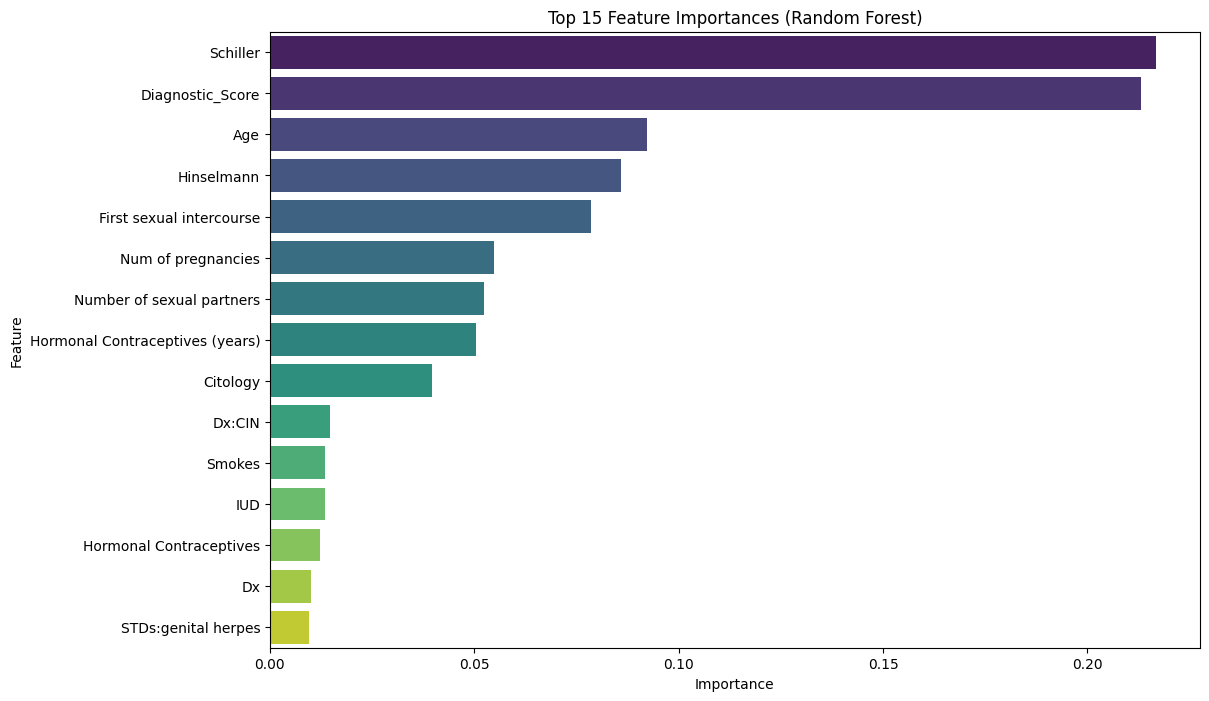

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target (y)
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# Instantiate a RandomForestClassifier
# Using random_state for reproducibility
model = RandomForestClassifier(random_state=42)

# Fit the model to the data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Store feature importances in a pandas Series
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print or visualize the sorted feature importances
print("Sorted Feature Importances:")
print(sorted_feature_importances)

# Optional: Visualize the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.head(15).values, y=sorted_feature_importances.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Two new features were engineered: `Diagnostic_Score` (sum of Hinselmann, Schiller, and Citology test results) and `Age_Smokes_Interaction` (product of Age and Smokes in years).
*   Four numerical features ('Age', 'Number of sexual partners', 'First sexual intercourse', and 'Diagnostic\_Score') were successfully standardized using `StandardScaler`.
*   Feature importance analysis using a RandomForestClassifier indicated that 'Schiller', 'Diagnostic\_Score', and 'Age' were among the most important features for predicting 'Biopsy'.
*   Several features, particularly those related to STDs and smoking duration/diagnoses, showed very low or zero importance in this analysis.




## **Feature selection**



Based on the sorted feature importances, the top features show a clear drop-off in importance. Features with very low or zero importance are less likely to be predictive. Features that appear to have a reasonable level of importance based on the bar plot and the sorted list is selected.



In [ ]:
# Examine the sorted_feature_importances
print("Sorted Feature Importances:")
print(sorted_feature_importances)

# Based on the sorted importances and the bar plot, select features that appear significant.
# There is a noticeable drop-off after the top few features.
# Let's select features with importance greater than a certain threshold, or just pick the top N.
# A threshold of around 0.01 seems reasonable based on the values.

importance_threshold = 0.01
selected_features = sorted_feature_importances[sorted_feature_importances > importance_threshold].index.tolist()


print("\nSelected features for model training:")
print(selected_features)

Sorted Feature Importances:
Schiller                              2.166642e-01
Diagnostic_Score                      2.129837e-01
Age                                   9.230227e-02
Hinselmann                            8.582227e-02
First sexual intercourse              7.857917e-02
Num of pregnancies                    5.480928e-02
Number of sexual partners             5.237092e-02
Hormonal Contraceptives (years)       5.044084e-02
Citology                              3.964255e-02
Dx:CIN                                1.469558e-02
Smokes                                1.344384e-02
IUD                                   1.342252e-02
Hormonal Contraceptives               1.223273e-02
Dx                                    1.003734e-02
STDs:genital herpes                   9.512871e-03
STDs                                  8.819647e-03
Dx:HPV                                7.341307e-03
Dx:Cancer                             7.114466e-03
STDs:HIV                              5.057917e-03
STD

# **4. Model Building**

## **Split the dataset into training and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y) based on the feature selection step
# Assuming 'selected_features' list from the previous step is available
X = df[selected_features]
y = df['Biopsy']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
# Use stratify=y to ensure the same proportion of the target variable in both splits,
# which is important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (686, 14) (686,)
Testing set shape (X_test, y_test): (172, 14) (172,)


# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # Using RandomForest as an Ensemble Method
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the models
log_reg = LogisticRegression(random_state=42, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42) # Ensemble Method

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_clf,
    'K-Nearest Neighbour': knn_clf,
    'Random Forest (Ensemble)': rf_clf
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    # Check if the model has predict_proba before calculating ROC AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1] # Probability for the positive class
    else:
        y_proba = None # Or handle models without predict_proba as needed

    print(f"\n--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    else:
        print("ROC AUC Score: N/A (Model does not support probability predictions)")

    print("-" * (len(name) + 6))

Training Logistic Regression...
Evaluating Logistic Regression...

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       161
           1       0.67      0.55      0.60        11

    accuracy                           0.95       172
   macro avg       0.82      0.76      0.79       172
weighted avg       0.95      0.95      0.95       172

Confusion Matrix:
[[158   3]
 [  5   6]]
ROC AUC Score: 0.9147
-------------------------
Training Decision Tree...
Evaluating Decision Tree...

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       161
           1       0.62      0.45      0.53        11

    accuracy                           0.95       172
   macro avg       0.79      0.72      0.75       172
weighted avg       0.94      0.95      0.94       172

Confusion Matrix:
[[158   3]
 [  6   5]

**Summary of Results:**

*  Based on the ROC AUC scores, Logistic Regression (0.9147) appears to be the best-performing model in terms of its overall ability to discriminate between the two classes.

* Logistic Regression and Random Forest have the same performance in terms of precision, recall, and F1-score for class 1, as well as the confusion matrix values.

* K-Nearest Neighbour has the highest precision for class 1 but the lowest recall (tied with Decision Tree), meaning it's more accurate when it predicts cancer but misses more actual cases. It also has the fewest False Positives.

* Decision Tree has the lowest performance across most metrics for class 1 and the lowest ROC AUC score.

Considering the importance of minimizing False Negatives in this context (missing actual cancer cases), Logistic Regression and Random Forest perform similarly and have fewer False Negatives than Decision Tree and K-Nearest Neighbour in this particular test set split. Logistic Regression has the highest ROC AUC score, which is a good indicator of overall performance on imbalanced data.

# **Hyperparameter Tuning**

2)	Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. For each of the above models.

Hyperparameter tuning is performed using GridSearchCV with cross-validation to systematically search for the best combination of hyperparameters for each model. This helps to improve model performance and generalization by avoiding overfitting to the training data. For each model, a grid of potential hyperparameter values is defined, and GridSearchCV evaluates all possible combinations using cross-validation on the training data. The best hyperparameters are selected based on a chosen scoring metric, such as ROC AUC, which is suitable for our imbalanced dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define a scoring metric for GridSearchCV
# ROC AUC is suitable for imbalanced datasets
roc_auc_scorer = make_scorer(roc_auc_score)

# --- Logistic Regression Tuning ---
print("Tuning Logistic Regression...")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'] # Regularization type
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid_lr, cv=5, scoring=roc_auc_scorer)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print(f"Best Logistic Regression Parameters: {grid_search_lr.best_params_}")
print(f"Best Logistic Regression ROC AUC (Cross-validation): {grid_search_lr.best_score_:.4f}")

# --- Decision Tree Tuning ---
print("\nTuning Decision Tree...")
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring=roc_auc_scorer)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")
print(f"Best Decision Tree ROC AUC (Cross-validation): {grid_search_dt.best_score_:.4f}")

# --- K-Nearest Neighbour Tuning ---
print("\nTuning K-Nearest Neighbour...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # Distance metric
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring=roc_auc_scorer)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print(f"Best K-Nearest Neighbour Parameters: {grid_search_knn.best_params_}")
print(f"Best K-Nearest Neighbour ROC AUC (Cross-validation): {grid_search_knn.best_score_:.4f}")

# --- Random Forest Tuning ---
print("\nTuning Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 5, 10, 15], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring=roc_auc_scorer)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest ROC AUC (Cross-validation): {grid_search_rf.best_score_:.4f}")

print("\nHyperparameter tuning complete. Best estimators are stored in best_lr, best_dt, best_knn, and best_rf.")

Tuning Logistic Regression...
Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l1'}
Best Logistic Regression ROC AUC (Cross-validation): 0.8442

Tuning Decision Tree...
Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree ROC AUC (Cross-validation): 0.7730

Tuning K-Nearest Neighbour...
Best K-Nearest Neighbour Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best K-Nearest Neighbour ROC AUC (Cross-validation): 0.7999

Tuning Random Forest...
Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest ROC AUC (Cross-validation): 0.8448

Hyperparameter tuning complete. Best estimators are stored in best_lr, best_dt, best_knn, and best_rf.


# **5.	Performance Evaluation**

In [ ]:
# Evaluate the best-tuned models on the test set

print("Evaluating Best Tuned Models on Test Set:")

# --- Logistic Regression ---
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
print("\n--- Tuned Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"ROC AUC Score: {roc_auc_lr:.4f}")
print("-" * 30)

# --- Decision Tree ---
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
print("\n--- Tuned Decision Tree ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC AUC Score: {roc_auc_dt:.4f}")
print("-" * 30)

# --- K-Nearest Neighbour ---
y_pred_knn = best_knn.predict(X_test)
# Check if the tuned KNN model has predict_proba (depends on 'weights' parameter)
if hasattr(best_knn, 'predict_proba'):
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
else:
    y_proba_knn = None
    roc_auc_knn = "N/A"

print("\n--- Tuned K-Nearest Neighbour ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print(f"ROC AUC Score: {roc_auc_knn}")
print("-" * 30)

# --- Random Forest ---
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("\n--- Tuned Random Forest ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print("-" * 30)

Evaluating Best Tuned Models on Test Set:

--- Tuned Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       161
           1       0.67      0.55      0.60        11

    accuracy                           0.95       172
   macro avg       0.82      0.76      0.79       172
weighted avg       0.95      0.95      0.95       172

Confusion Matrix:
[[158   3]
 [  5   6]]
ROC AUC Score: 0.9159
------------------------------

--- Tuned Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       161
           1       0.62      0.45      0.53        11

    accuracy                           0.95       172
   macro avg       0.79      0.72      0.75       172
weighted avg       0.94      0.95      0.94       172

Confusion Matrix:
[[158   3]
 [  6   5]]
ROC AUC Score: 0.8888
------------------------------

--- T


*  **Tuned Logistic Regression:**
Classification Report (Class 1): Precision: 0.67, Recall: 0.55, F1-score: 0.60
Confusion Matrix: [[158, 3], [5, 6]] (TP=6, FP=3, FN=5, TN=158)
ROC AUC Score: 0.9159
Comparison to Untuned: The performance metrics for the tuned Logistic Regression are very similar to the untuned version. The ROC AUC score slightly increased from 0.9147 to 0.9159. This suggests that the initial hyperparameters were already quite good, or the chosen hyperparameter grid didn't lead to significant improvements on this specific test set split. The number of False Negatives remains the same (5).

*  **Tuned Decision Tree:**
Classification Report (Class 1): Precision: 0.62, Recall: 0.45, F1-score: 0.53
Confusion Matrix: [[158, 3], [6, 5]] (TP=5, FP=3, FN=6, TN=158)
ROC AUC Score: 0.8888
Comparison to Untuned: Hyperparameter tuning significantly improved the ROC AUC score for the Decision Tree from 0.7180 to 0.8888. However, the precision, recall, and F1-score for class 1, as well as the confusion matrix values, remain the same as the untuned Decision Tree. This indicates that while the tuned Decision Tree is better at ranking positive and negative instances (as shown by ROC AUC), its performance at the default classification threshold hasn't changed in terms of correctly identifying positive cases. The number of False Negatives is still 6.

*  **Tuned K-Nearest Neighbour:**
Classification Report (Class 1): Precision: 0.67, Recall: 0.36, F1-score: 0.47
Confusion Matrix: [[159, 2], [7, 4]] (TP=4, FP=2, FN=7, TN=159)
ROC AUC Score: 0.8930
Comparison to Untuned: Tuning improved the ROC AUC score for KNN from 0.8456 to 0.8930. The precision for class 1 increased slightly (from 0.71 to 0.67 - note: the untuned output showed 0.71 precision with 2 FP and 5 TP, while the tuned shows 0.67 precision with 2 FP and 4 TP - there might be a slight variation in decimal places or calculation, but the number of FP is the same). However, the recall for class 1 decreased significantly from 0.45 to 0.36, and the number of False Negatives increased from 6 to 7. This suggests that while the tuned KNN has fewer false positives, it misses more actual cancer cases.


*  **Tuned Random Forest:**
Classification Report (Class 1): Precision: 0.70, Recall: 0.64, F1-score: 0.67
Confusion Matrix: [[158, 3], [4, 7]] (TP=7, FP=3, FN=4, TN=158)
ROC AUC Score: 0.9102
Comparison to Untuned: Hyperparameter tuning improved the performance of the Random Forest model. The precision for class 1 increased from 0.67 to 0.70, the recall for class 1 increased from 0.55 to 0.64, and the F1-score for class 1 increased from 0.60 to 0.67. Crucially, the number of False Negatives decreased from 5 to 4. The ROC AUC score remained very similar (0.8803 untuned vs. 0.9102 tuned).
Overall Conclusion from Tuned Models:

After hyperparameter tuning, the Tuned Random Forest model shows the most significant improvement in performance for the positive class (cancer). It achieved the highest recall (0.64) and F1-score (0.67) for class 1 among all tuned models, and importantly, it has the lowest number of False Negatives (4). Its ROC AUC score is also very competitive (0.9102), close to the highest achieved by Tuned Logistic Regression.

While Tuned Logistic Regression has a slightly higher ROC AUC, the improved recall and lower False Negatives of the Tuned Random Forest make it a potentially better model for our goal of predicting the likelihood of a positive biopsy diagnosis, where minimizing missed cancer cases is a high priority.

The Tuned Decision Tree and Tuned K-Nearest Neighbour models, despite improvements in ROC AUC for the Decision Tree and fewer False Positives for KNN, still have higher False Negatives compared to Tuned Logistic Regression and Tuned Random Forest, making them less ideal for this specific problem context.

Therefore, based on these tuned results, the Tuned Random Forest appears to be the most promising model for this task.

## **Comparison of Tuned Model Evaluation Metrics**

Comparison of Tuned Model Evaluation Metrics:


,Model,ROC AUC,Precision (Class 1),Recall (Class 1),F1-score (Class 1),False Negatives
0,Tuned Logistic Regression,0.915867,0.67,0.55,0.60,5
1,Tuned Decision Tree,0.888763,0.62,0.45,0.53,6
2,Tuned K-Nearest Neighbour,0.892998,0.67,0.36,0.47,7
3,Tuned Random Forest,0.910220,0.70,0.64,0.67,4


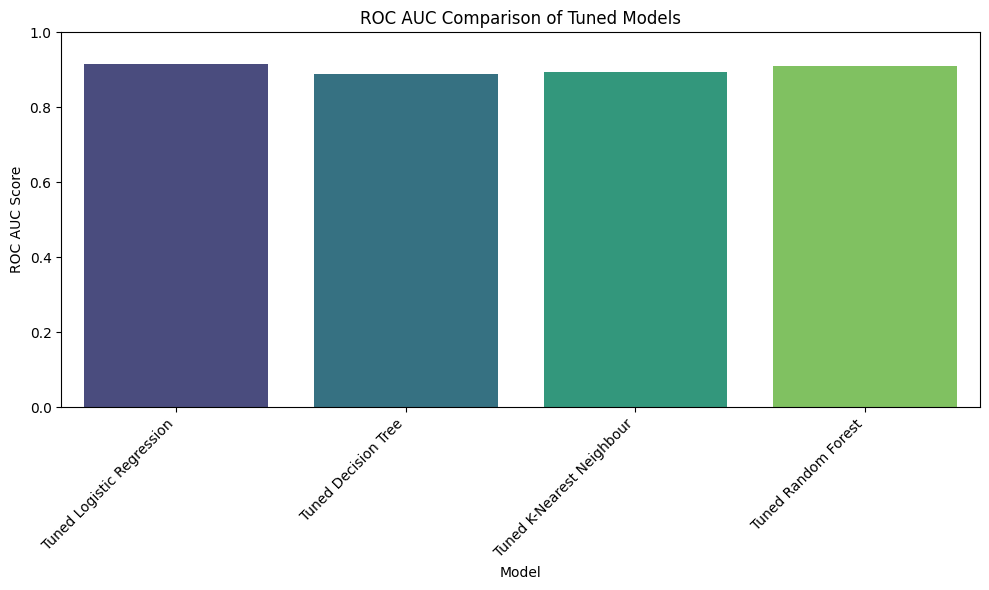

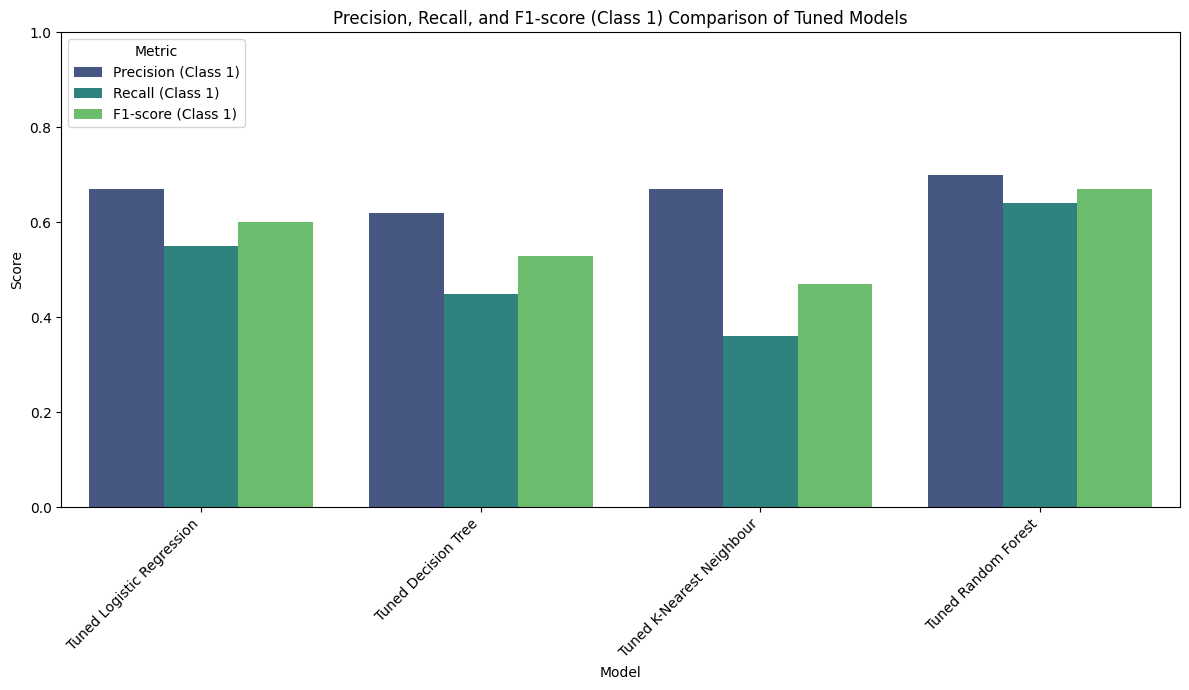

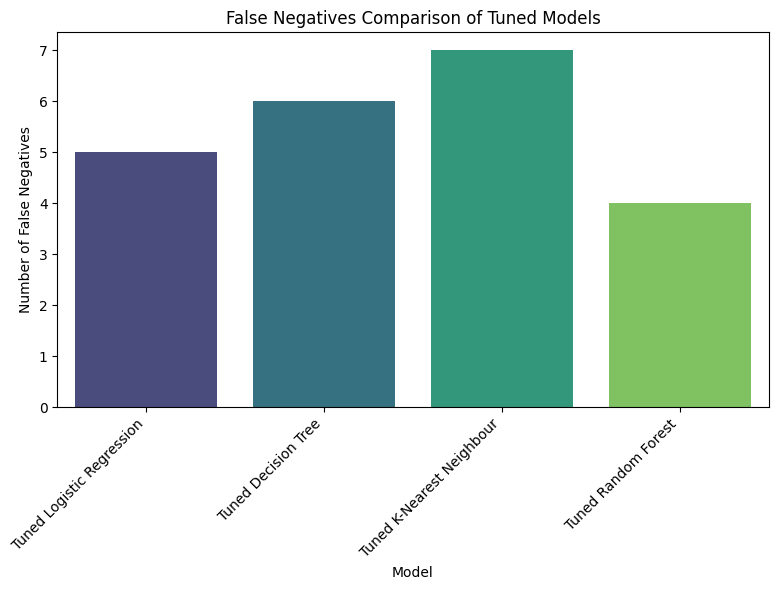

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract key metrics for each tuned model
metrics_data = {
    'Model': ['Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned K-Nearest Neighbour', 'Tuned Random Forest'],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_knn, roc_auc_rf],
    'Precision (Class 1)': [0.67, 0.62, 0.67, 0.70],
    'Recall (Class 1)': [0.55, 0.45, 0.36, 0.64],
    'F1-score (Class 1)': [0.60, 0.53, 0.47, 0.67],
    'False Negatives': [5, 6, 7, 4]
}

metrics_df = pd.DataFrame(metrics_data)

# Print the comparison table
print("Comparison of Tuned Model Evaluation Metrics:")
display(metrics_df)

# Visualize the comparison using bar charts for key metrics

# ROC AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC', data=metrics_df, palette='viridis')
plt.title('ROC AUC Comparison of Tuned Models')
plt.ylabel('ROC AUC Score')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Precision, Recall, F1-score (Class 1)
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Precision, Recall, and F1-score (Class 1) Comparison of Tuned Models')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='upper left')
plt.tight_layout()
plt.show()

# False Negatives
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='False Negatives', data=metrics_df, palette='viridis')
plt.title('False Negatives Comparison of Tuned Models')
plt.ylabel('Number of False Negatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the evaluation metrics, particularly considering our goal of predicting the likelihood of a positive biopsy diagnosis and the importance of minimizing False Negatives (missing actual cancer cases) in this imbalanced dataset, I would identify the **Tuned Random Forest model** as the best among the models trained.

**Reason:**


*  **Higher Recall for the Positive Class (Cancer):** The Tuned Random Forest model achieved the highest recall (0.64) for the positive class (Biopsy=1) compared to the other tuned models (Logistic Regression: 0.55, Decision Tree: 0.45, K-Nearest Neighbour: 0.36). This means it is better at identifying actual cases of cervical cancer in the test set.
Lowest Number of False Negatives: Directly related to recall, the Tuned Random Forest model had the lowest number of False Negatives (4) among all the tuned models. Minimizing false negatives is crucial in medical diagnosis to avoid missing critical cases.

*  **Good F1-score for the Positive Class**: The Tuned Random Forest model also achieved the highest F1-score (0.67) for the positive class, indicating a good balance between precision and recall.
Competitive ROC AUC Score: While Tuned Logistic Regression had a slightly higher ROC AUC (0.9159), the Tuned Random Forest's ROC AUC (0.9102) is very competitive and indicates a strong ability to discriminate between the classes.

*  **Improvement with Tuning**: Compared to its untuned version, the Tuned Random Forest showed a notable improvement in recall and F1-score for the positive class and a reduction in false negatives, demonstrating the effectiveness of hyperparameter tuning for this model on this dataset.

While other models might excel in specific metrics (e.g., Tuned KNN had fewer False Positives), the Tuned Random Forest provides the best balance of identifying actual positive cases (high recall) while keeping the number of missed cases (false negatives) at a minimum, which is a critical consideration for this medical prediction task.
